In [1]:
import h5py
import numpy as np
import pandas as pd
from PIL import ImageDraw, Image, ImageEnhance
from matplotlib import pyplot as plt
from pathlib import Path
import cv2

In [2]:
import fastmri
from fastmri.data import transforms as T

### Import Dataset

In [3]:
file_path = Path('/mnt/f/datasets/demo_data')
file_name = '/mnt/f/datasets/demo_data/file1000002.h5' # Add the file name itself.
hf = h5py.File(file_name,'r')

In [4]:
annotatedSliceDataset = fastmri.data.mri_data.AnnotatedSliceDataset(file_path,"multicoil","knee","all", annotation_version="640500fb")

In [5]:
print(annotatedSliceDataset[0])

(array([[[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.

### Choose Slice

In [6]:
slice_choice = 25

#df = pd.DataFrame(annotatedSliceDataset.annotated_examples(file_name, slice_choice))
#labels_for_slice = df[(df[0] == file_name) & (df[1] == slice_choice)][2].values.tolist()
#labels_for_slice

### Render Bounding Box

In [7]:
def plot_bounding_box(image, labels):
  plotted_image = ImageDraw.Draw(image)
  for label in labels:
    _, _, _, x0, y0, w, h, label_txt = label['annotation'].values()
    x1 = x0 + w
    y1 = y0 + h
    plotted_image.rectangle(((x0,y0), (x1,y1)), outline="white") 
    plotted_image.text((x0, max(0, y0 - 10)), label_txt, fill= "white")
  return np.array(image)

In [8]:
img_data = hf['reconstruction_rss'][:]
img_data.shape

(38, 320, 320)

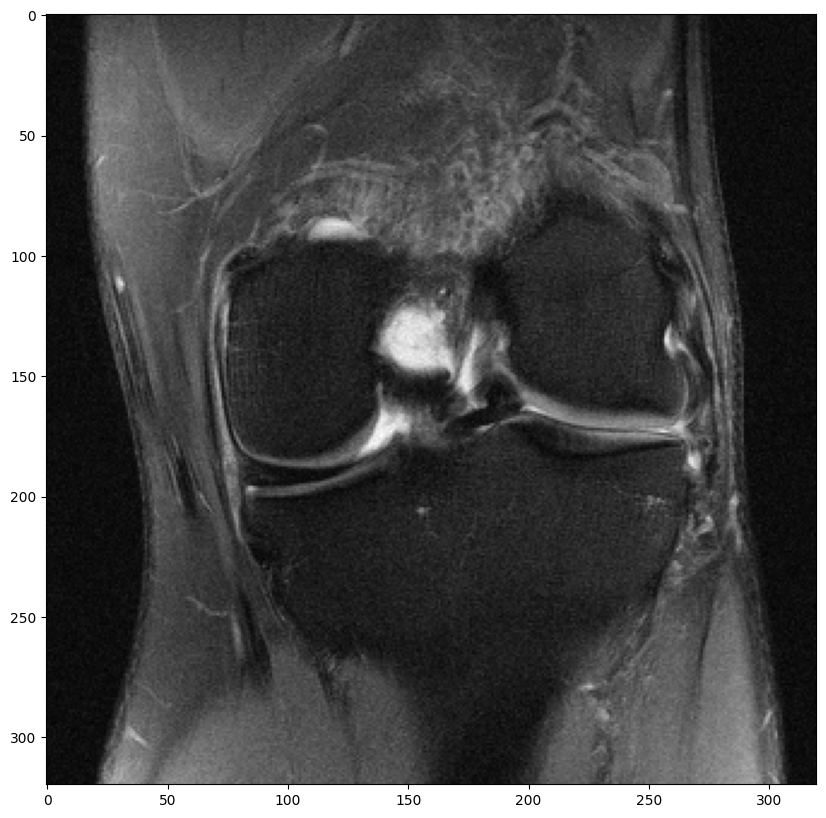

In [9]:
arrimg = np.flipud(np.squeeze(img_data[slice_choice, :, :]))
image_2d_scaled = (np.maximum(arrimg, 0) / arrimg.max()) * 255.0
image_2d_scaled = Image.fromarray(np.uint8(image_2d_scaled))
# annotated_img = plot_bounding_box(image_2d_scaled, labels_for_slice) # I don't know why this line is not working, but it should plot the bounding boxes on the image.
plt.figure(figsize = (10,10))
plt.imshow(image_2d_scaled,'gray')
plt.show()

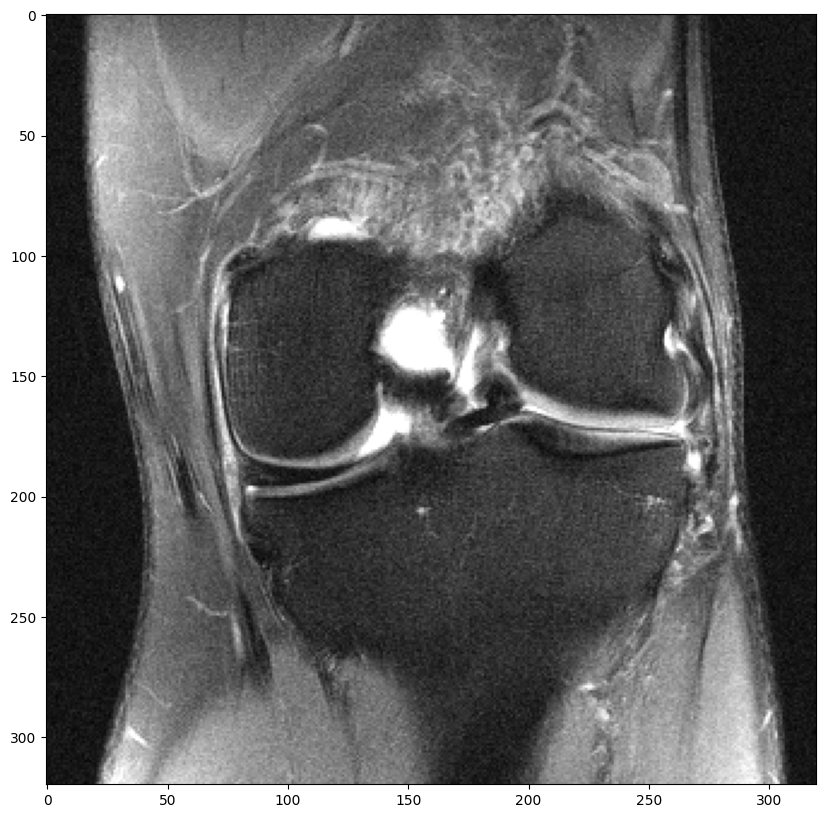

In [10]:
enhancer = ImageEnhance.Brightness(image_2d_scaled)
annotated_img_enhanced = enhancer.enhance(1.5)
plt.figure(figsize = (10,10))
plt.imshow(annotated_img_enhanced,'gray')
plt.show()

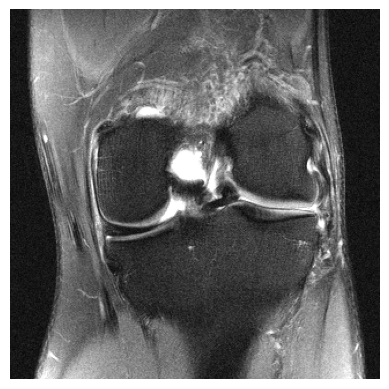

In [11]:
plt.figure()
plt.imshow(annotated_img_enhanced, 'gray')
plt.axis('off')  # Hide axes
plt.savefig("output_slice.png", bbox_inches='tight', pad_inches=0)
plt.show()